A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

In [ ]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [ ]:
df.info()

In [2]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df['income'] = df['income'].str.replace('.', '', regex=False)

In [14]:
# Verificar valores faltantes en cada columna
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


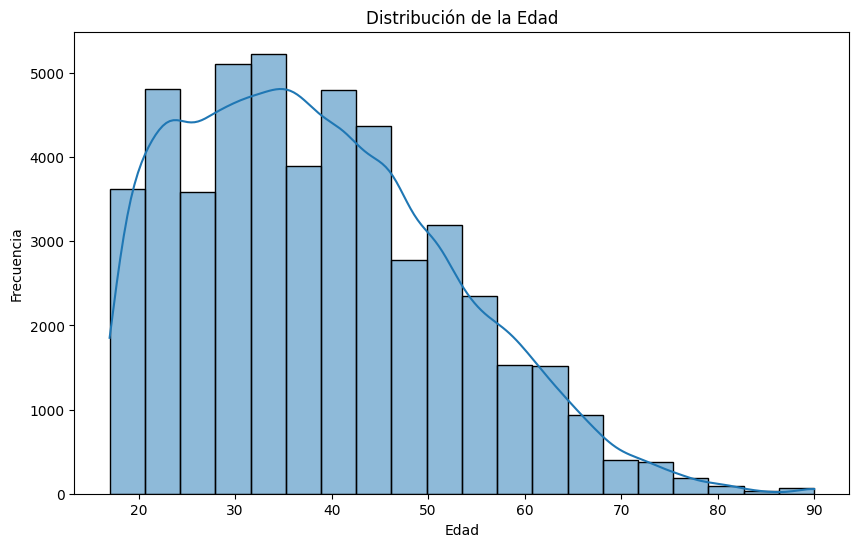

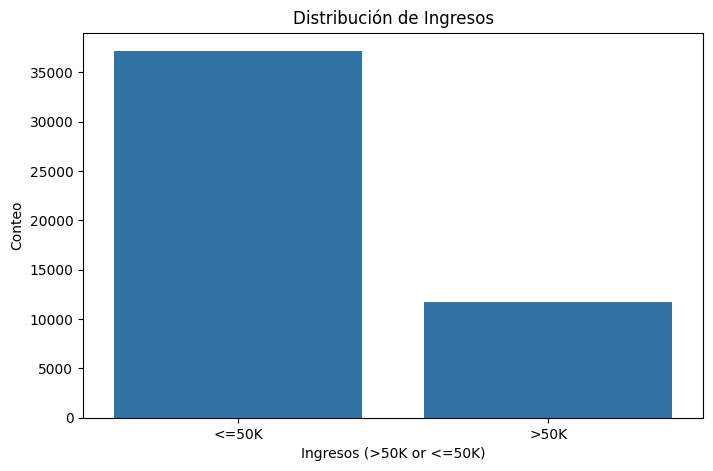

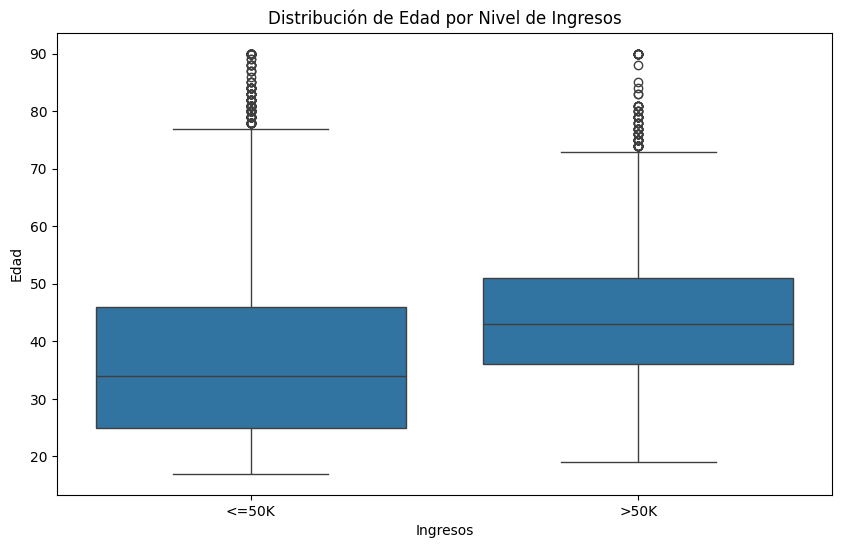

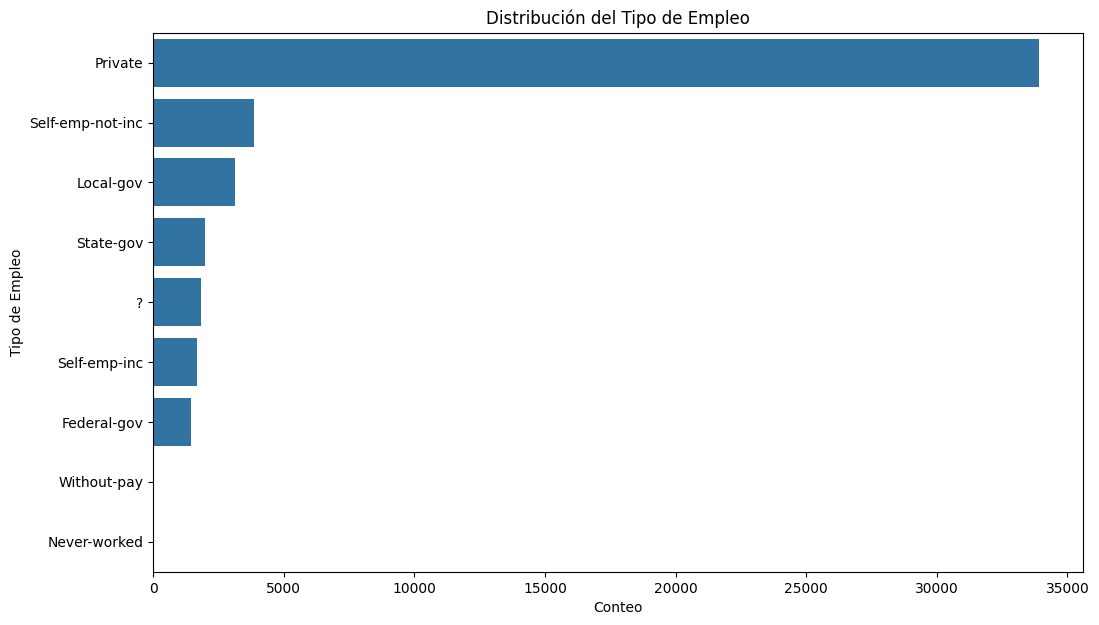

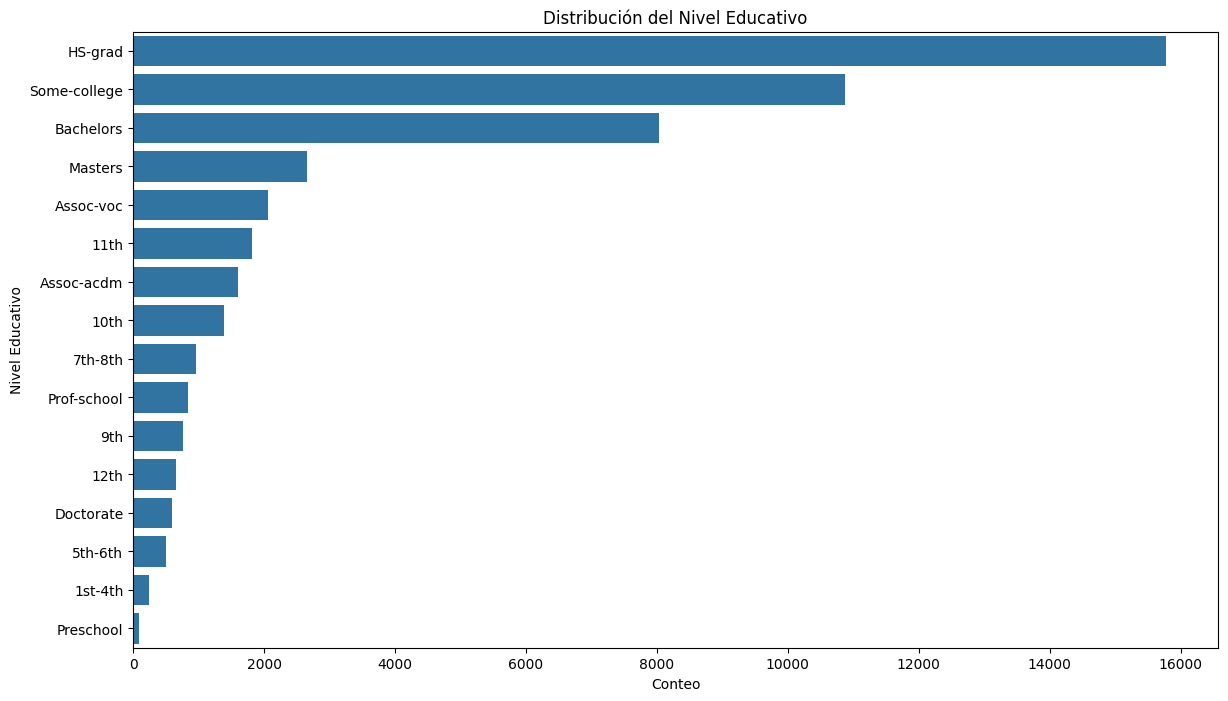

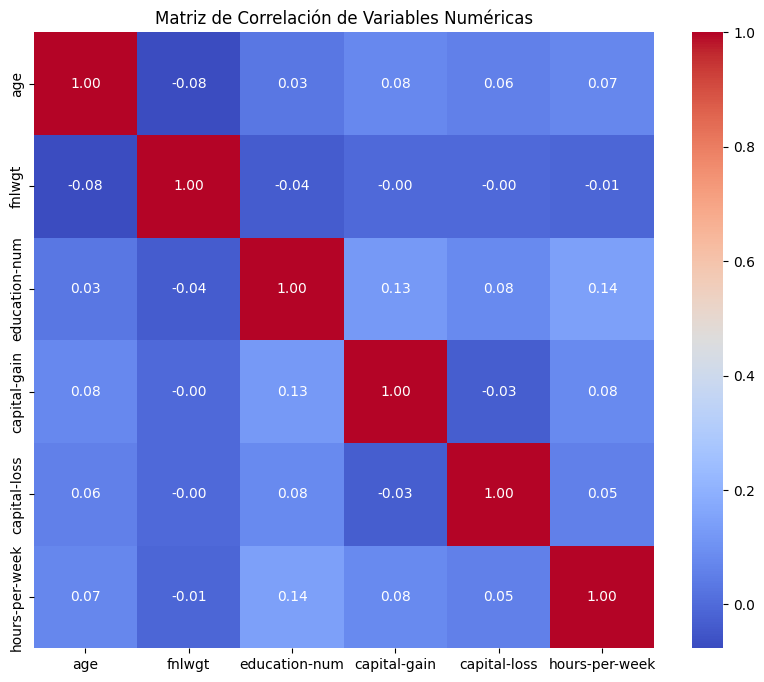

In [15]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Histograma para la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la variable 'income' (variable target)
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=df)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos (>50K or <=50K)')
plt.ylabel('Conteo')
plt.show()

# Boxplot para comparar la distribución de 'age' entre los grupos de 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Distribución de Edad por Nivel de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Edad')
plt.show()

# Gráfico de barras para la variable 'workclass'
plt.figure(figsize=(12, 7))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Distribución del Tipo de Empleo')
plt.xlabel('Conteo')
plt.ylabel('Tipo de Empleo')
plt.show()

# Gráfico de barras para la variable 'education'
plt.figure(figsize=(14, 8))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribución del Nivel Educativo')
plt.xlabel('Conteo')
plt.ylabel('Nivel Educativo')
plt.show()

# Calcular la matriz de correlación para variables numéricas
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


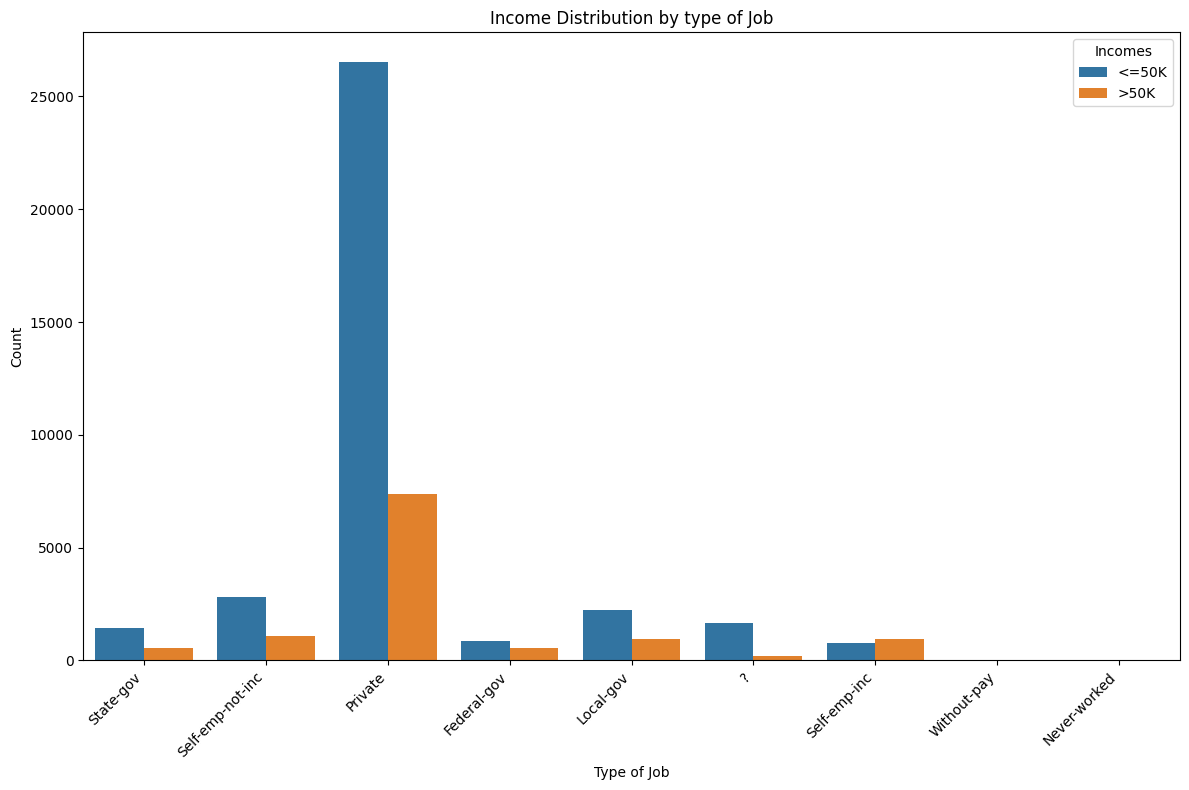

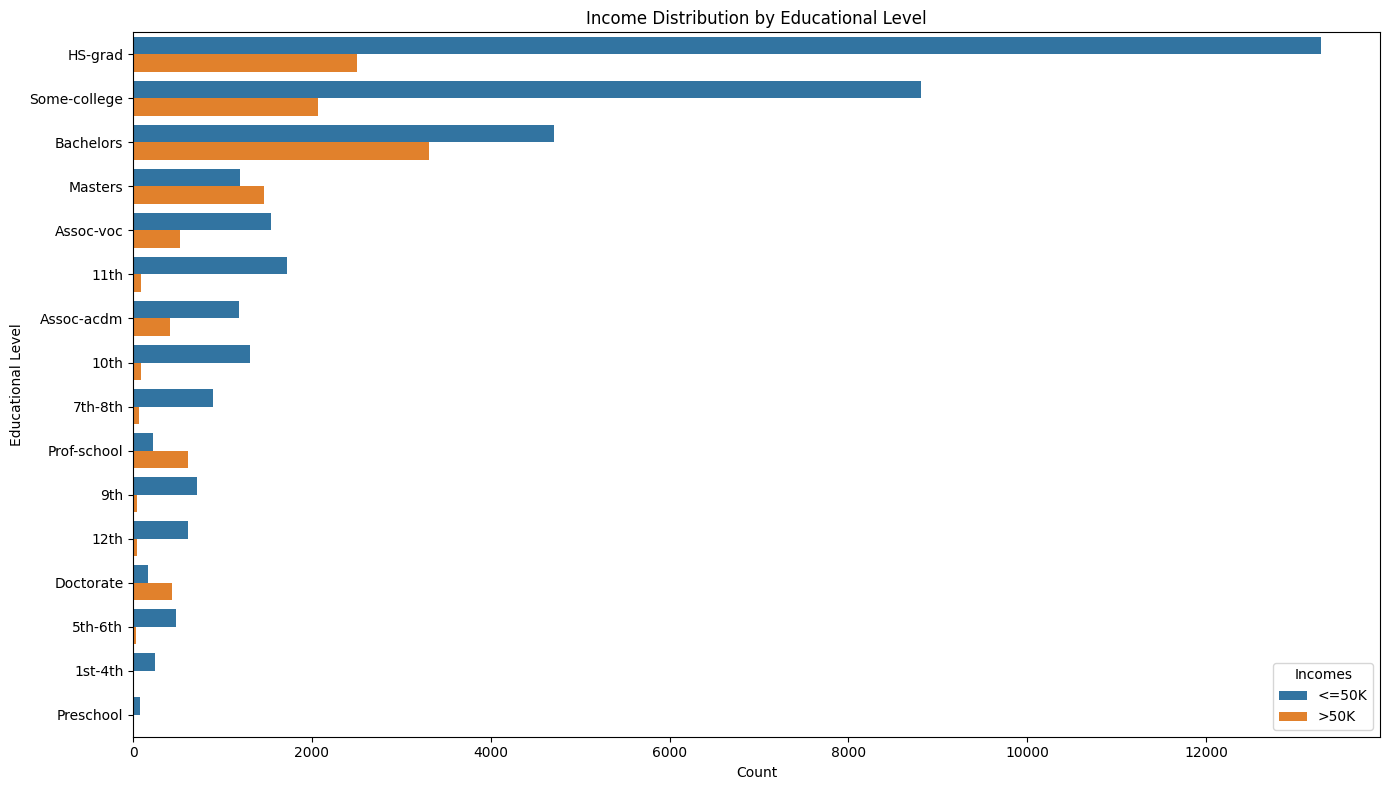

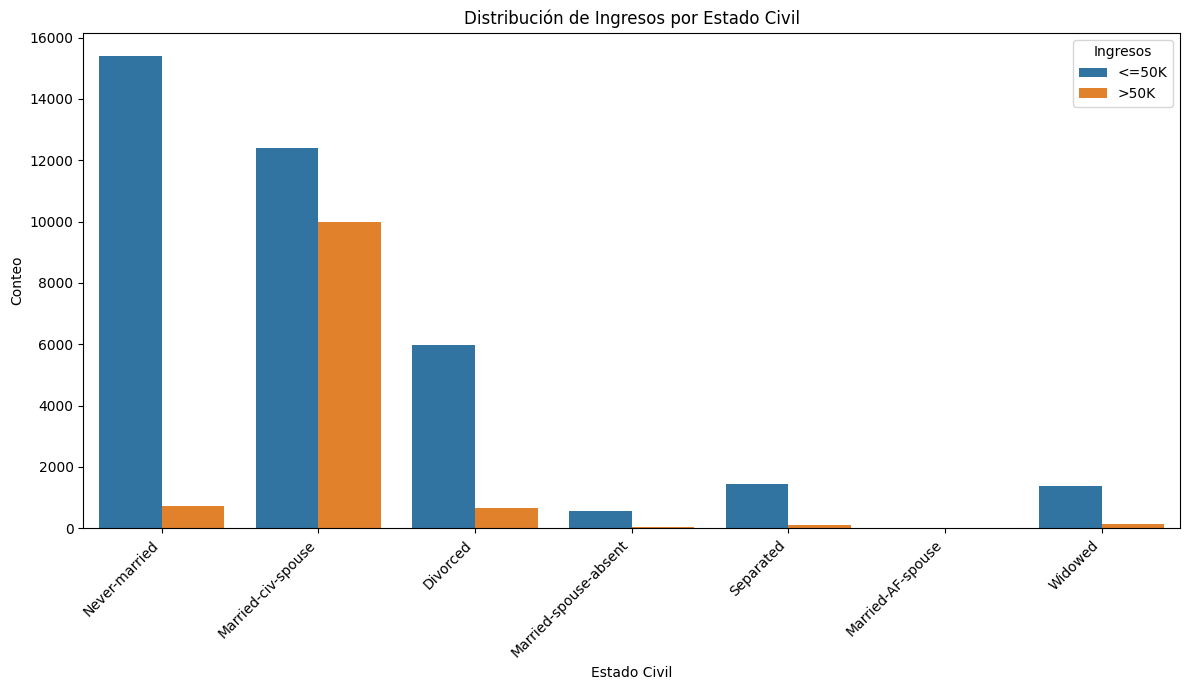

In [16]:
# Gráfico de barras apiladas para 'workclass' y 'income'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Income Distribution by type of Job')
plt.xlabel('Type of Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incomes')
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para 'education' y 'income'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='education', hue='income', order=df['education'].value_counts().index)
plt.title('Income Distribution by Educational Level')
plt.xlabel('Count')
plt.ylabel('Educational Level')
plt.legend(title='Incomes')
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para 'marital-status' y 'income'
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='marital-status', hue='income')
plt.title('Distribución de Ingresos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ingresos')
plt.tight_layout()
plt.show()

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**